<a href="https://colab.research.google.com/github/mhabib80/Coursera_Capstone/blob/master/Chocolate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook Setup

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import cm
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Set plot parameters
plt.rcParams['text.color'] = 'grey'
plt.rcParams['axes.labelcolor']='grey'
plt.rcParams['axes.edgecolor']='grey'
plt.rcParams['axes.linewidth']=0.5
plt.rcParams['xtick.color']='grey'
plt.rcParams['ytick.color']='grey'
plt.rcParams['axes.spines.left']=False
plt.rcParams['axes.spines.top']=False
plt.rcParams['axes.spines.right']=False
plt.rcParams['axes.spines.bottom']=True
plt.rcParams['axes.grid.axis'] = 'y'

# Data Sourcing & Processing

In [ ]:
# Read table
df = pd.read_html('https://s3.amazonaws.com/codecademy-content/courses/beautifulsoup/cacao/index.html')
choc = df[1].copy()

In [ ]:
# Extract data
choc.columns = choc.iloc[0,:].values
choc.drop([0], axis = 0, inplace = True)

In [ ]:
# Rename Columns
choc.columns = [c.replace('  ', ' ').replace(' ', '_') for c in choc.columns]
choc.rename(columns = {'Company_(Maker-if_known)' : 'Company', 'Specific_Bean_Origin_or_Bar_Name': 'Bean_Origin'}, inplace = True)
choc.head()

,Company,Bean_Origin,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Broad_Bean_Origin
1,A. Morin,Agua Grande,1876,2016,63%,France,3.75,NaN,Sao Tome
2,A. Morin,Kpime,1676,2015,70%,France,2.75,NaN,Togo
3,A. Morin,Atsane,1676,2015,70%,France,3,NaN,Togo
4,A. Morin,Akata,1680,2015,70%,France,3.5,NaN,Togo
5,A. Morin,Quilla,1704,2015,70%,France,3.5,NaN,Peru


In [ ]:
choc['Cocoa_Percent'] = choc['Cocoa_Percent'].str.replace('\%', '')
choc['Cocoa_Percent'] = pd.to_numeric(choc['Cocoa_Percent'])
choc['Rating'] = pd.to_numeric(choc['Rating'])

# Chocolatiers by Country

In [ ]:
# Filter the Dataframe to the top 20 countries by value counts

choc_c = choc[choc['Company_Location'].isin(choc.Company_Location.value_counts().head(20).index)]

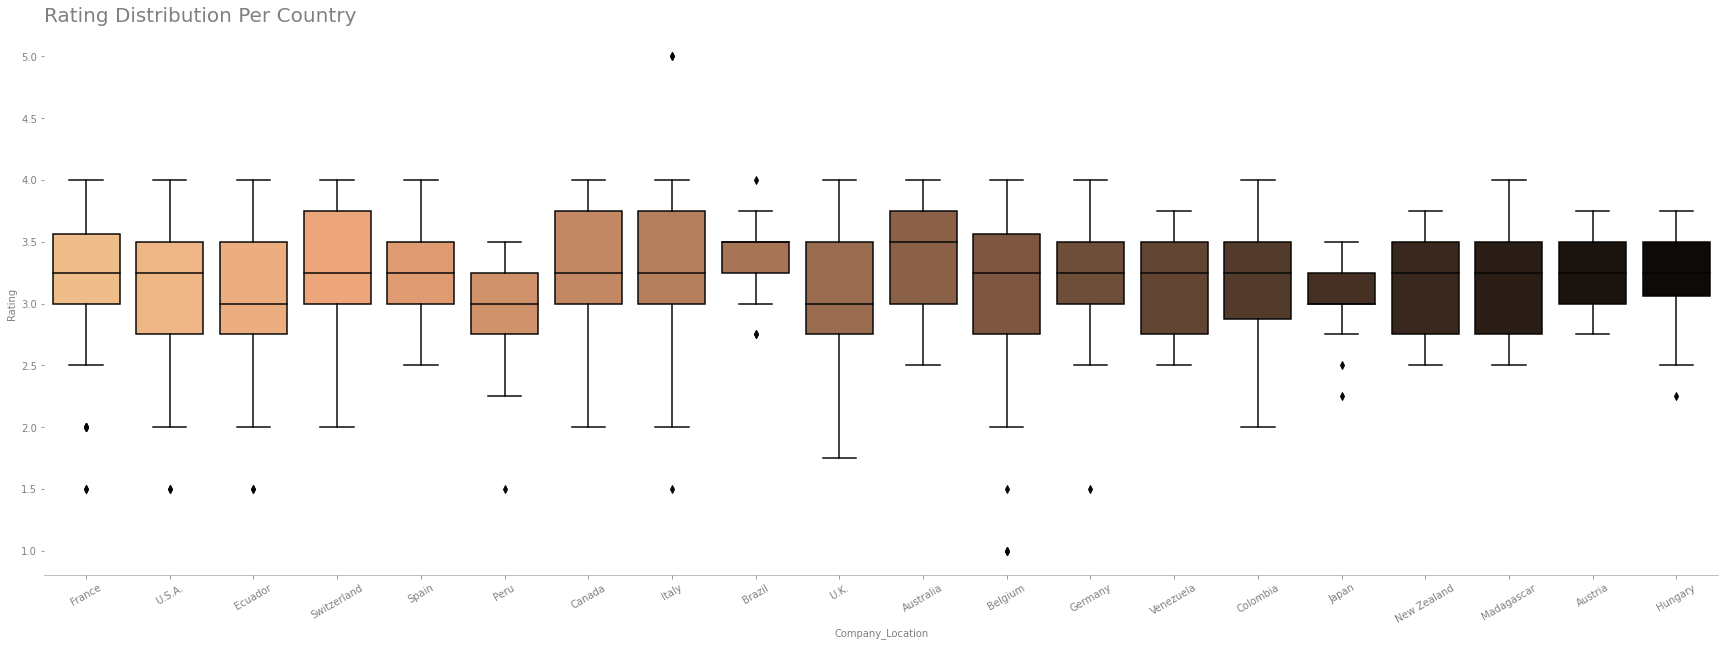

In [ ]:
#Distribution per Country

plt.figure(figsize = (30,10))
g = sns.boxplot(data = choc_c, x = 'Company_Location', y = 'Rating', palette='copper_r')
g.set_xticklabels(g.get_xticklabels(), rotation = 30, horizontalalignment = 'center')
g.set_title('Rating Distribution Per Country', loc = 'left', pad = 10, fontsize=20);

The country with the highest Median Rating actually happens to be Australia!

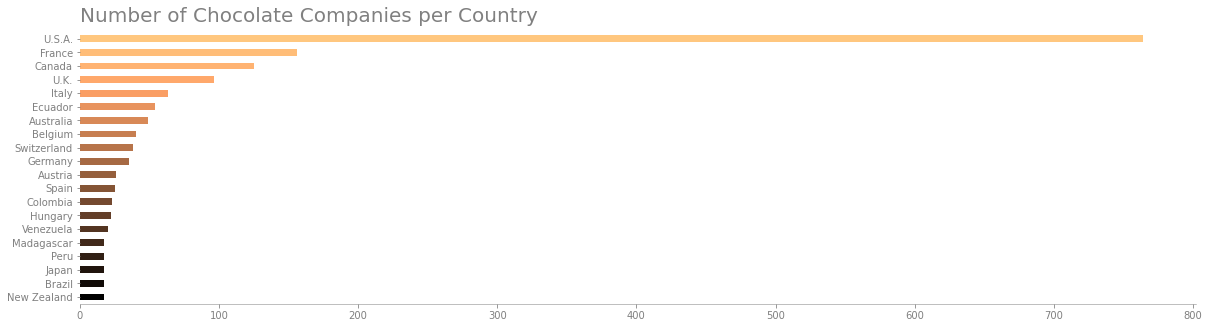

In [ ]:
choc['Company_Location'].value_counts().head(20).plot(kind='barh', color = cm.copper_r(np.linspace(0,1,20)), figsize=(20,5))
plt.grid(b = False)
plt.gca().invert_yaxis()
plt.title('Number of Chocolate Companies per Country', loc = 'left', pad = 10, fontsize=20);

The USA has by far the greatest number of chocolatiers!

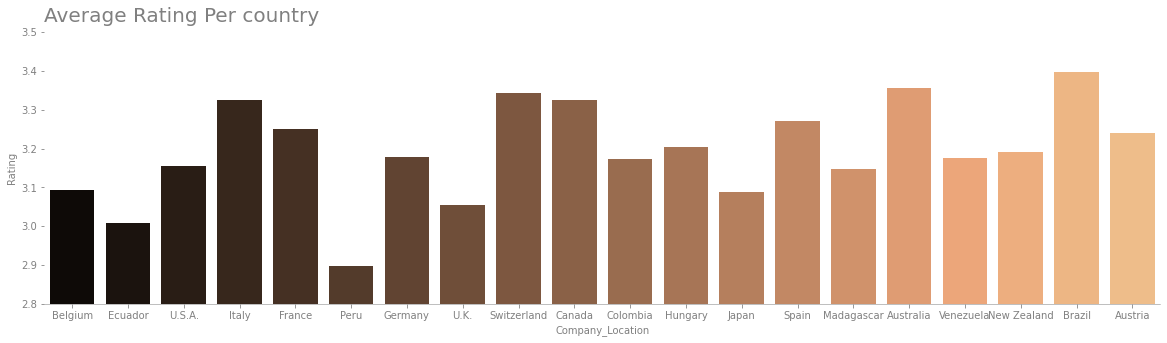

In [ ]:
# Average Rating per Country
choc_c = choc_c.sort_values('Rating')
plt.figure(figsize=(20,5))
ax = sns.barplot(data=choc_c, y='Rating', x='Company_Location', palette = 'copper', ci=None)
ax.set_title('Average Rating Per country', loc = 'left', pad = 10, fontsize=20)
ax.set_ylim([2.8, 3.5]);

In [ ]:
df = px.data.gapminder().query("year==2007")
choc_g = choc.groupby('Company_Location').Rating.mean().reset_index()
choc_g = pd.merge(choc_g, df[['country', 'iso_alpha']], left_on='Company_Location', right_on='country')
choc_g.drop(columns=['country'], axis=1, inplace=True)
choc_g['Rating_n'] = choc_g['Rating'] -2.5
choc_g.head()

,Company_Location,Rating,iso_alpha,Rating_n
0,Argentina,3.305556,ARG,0.805556
1,Australia,3.357143,AUS,0.857143
2,Austria,3.240385,AUT,0.740385
3,Belgium,3.093750,BEL,0.593750
4,Bolivia,3.250000,BOL,0.750000


In [ ]:
import plotly.express as px

fig = px.scatter_geo(choc_g, locations="iso_alpha", 
                     size="Rating_n",
                     projection="natural earth")
fig.show()

Highest rated countries are Switzerland, Brazil & Australia

# Companies

In [ ]:
choc.Company = choc.Company + ' - ' + choc.Company_Location
choc.head()

,Company,Bean_Origin,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Broad_Bean_Origin
1,A. Morin - France,Agua Grande,1876,2016,63.0,France,3.75,NaN,Sao Tome
2,A. Morin - France,Kpime,1676,2015,70.0,France,2.75,NaN,Togo
3,A. Morin - France,Atsane,1676,2015,70.0,France,3.00,NaN,Togo
4,A. Morin - France,Akata,1680,2015,70.0,France,3.50,NaN,Togo
5,A. Morin - France,Quilla,1704,2015,70.0,France,3.50,NaN,Peru


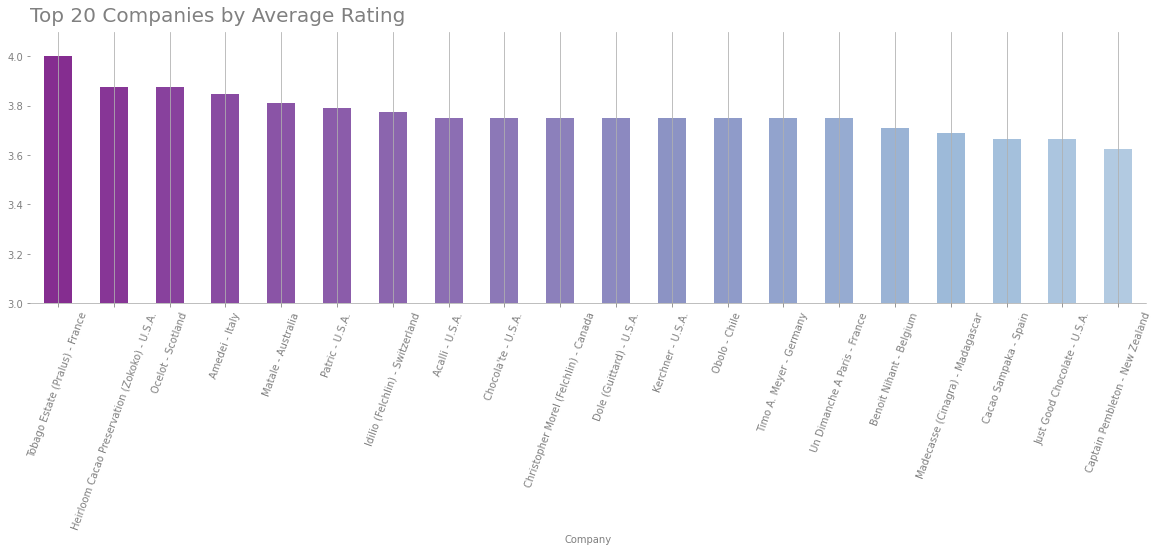

In [ ]:
#Top 20 Companies by Average Rating
Top20_companies = choc.groupby(['Company']).Rating.mean().nlargest(20)
ax = Top20_companies.plot(kind = 'bar', figsize=(20,5), color = cm.BuPu_r(np.linspace(0.2,0.7,20)))
ax.set_xticklabels(labels = ax.get_xticklabels(), rotation = 70)
ax.set_title('Top 20 Companies by Average Rating', loc = 'left', pad = 10, fontsize=20)
ax.set_ylim([3, 4.1])
ax.grid(axis='x');

# Bean Type & Origin

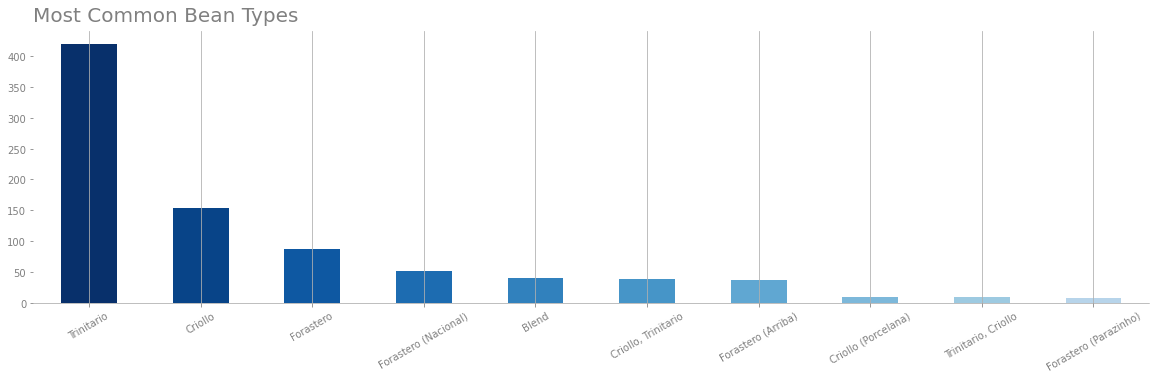

In [ ]:
# Most Common Bean Type
Top10_Bean_Type = choc['Bean_Type'].value_counts().head(10)
ax = Top10_Bean_Type.plot.bar(figsize=(20,5), color=cm.Blues_r(np.linspace(0,0.7,10)), rot=30)
ax.set_title('Most Common Bean Types', loc = 'left', pad = 10, fontsize=20)
plt.grid(axis='x')

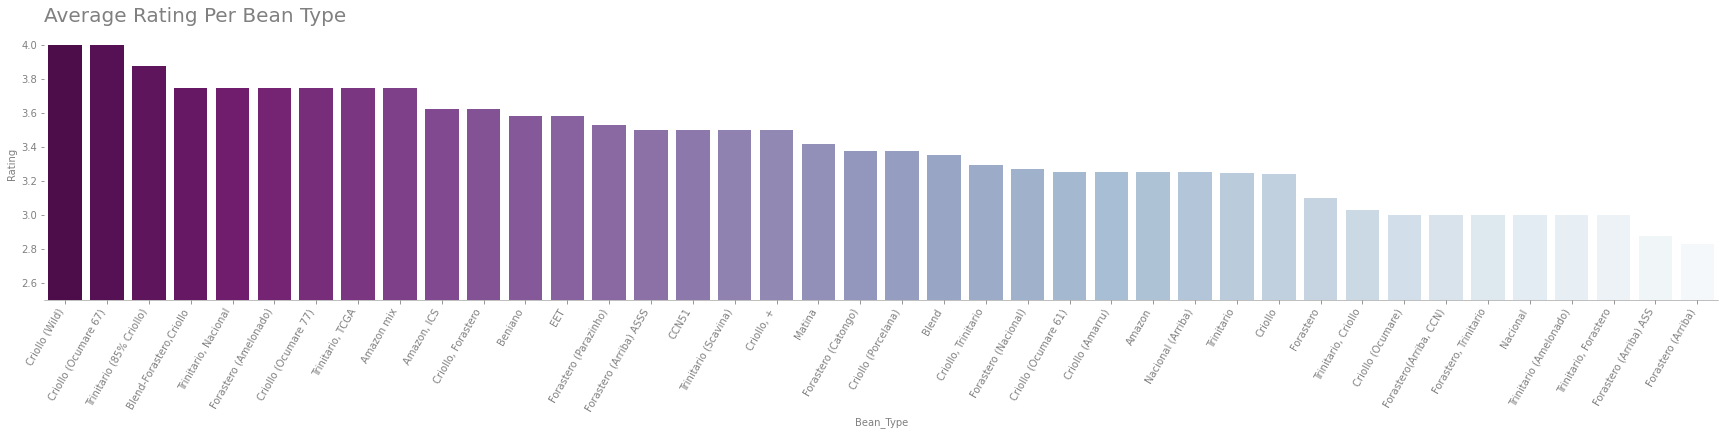

In [ ]:
order_b = choc.groupby('Bean_Type').Rating.mean().sort_values(ascending=False).index

plt.figure(figsize=(30,5))
ax=sns.barplot(data=choc, x='Bean_Type', y='Rating', ci=None, palette= 'BuPu_r', order = order_b)
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation = 60, horizontalalignment = 'right')
ax.set_title('Average Rating Per Bean Type', loc = 'left', fontsize=20)
ax.set_ylim([2.5, 4.1]);

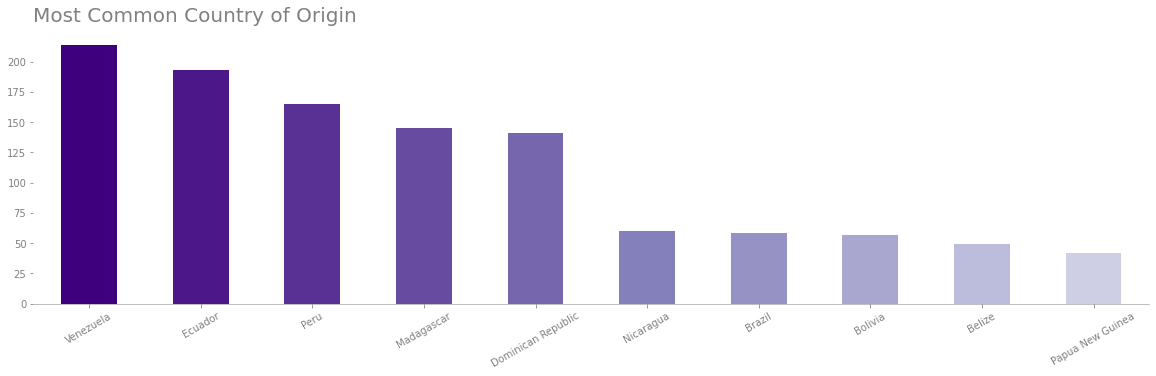

In [ ]:
# Most Common Country of Origin
Top10_Bean_origin = choc['Broad_Bean_Origin'].value_counts().head(10)
plt.figure(figsize=(20,10))
ax = Top10_Bean_origin.plot(kind='bar', color=cm.Purples_r(np.linspace(0,0.7,10)), figsize=(20,5))
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=30, horizontalalignment ='center')
ax.set_title('Most Common Country of Origin', loc = 'left', pad = 10, fontsize=20);

# Cocoa Percent

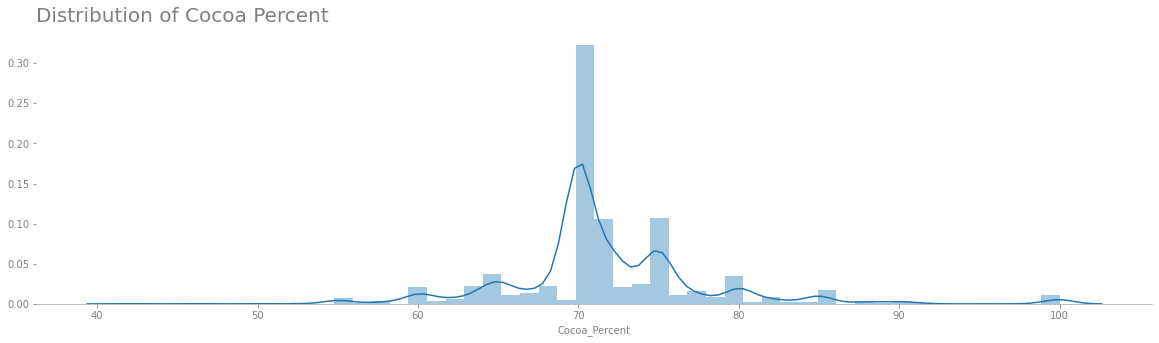

In [ ]:
plt.figure(figsize = (20,5))
ax = sns.distplot(choc.Cocoa_Percent, kde=True)
ax.set_title('Distribution of Cocoa Percent', loc = 'left', pad = 10, fontsize=20);

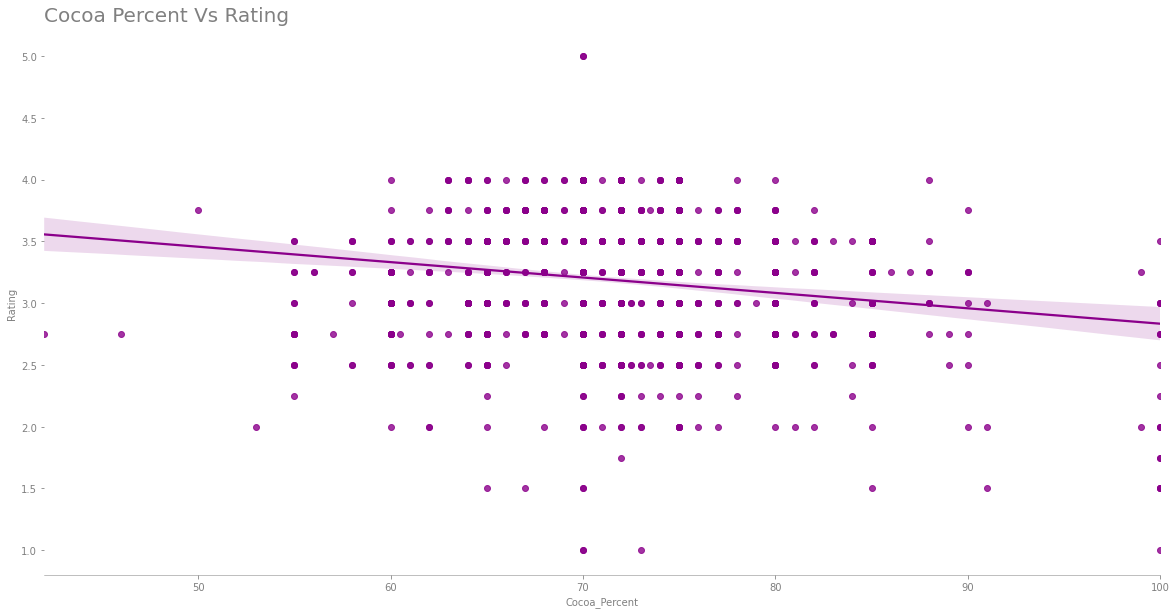

In [ ]:
plt.figure(figsize=(20,10))
ax = sns.regplot(data=choc, x='Cocoa_Percent', y='Rating', color = 'darkmagenta')
ax.set_title('Cocoa Percent Vs Rating', loc = 'left', pad = 10, fontsize=20);

It seems that highest ratings are in the 70%-90% CoCoa Percent range

In [ ]:
# Select the Top 10 bean types within 70-90% Cocoa Percent and with ratings higher than 1
choc_cp = choc[(choc.Cocoa_Percent >= 60) & (choc.Cocoa_Percent <= 90) & (choc.Bean_Type).isin(Top10_Bean_Type.index) & (choc.Rating > 1)]
#Create a table to generate a Heatmap
choc_cp_grouped = choc_cp.groupby(['Bean_Type', 'Rating']).Cocoa_Percent.median().unstack()
choc_cp_grouped

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(choc_cp_grouped, cmap='Purples', annot=True);

In [ ]:
# Highest rated Chocolate
choc[choc['Rating'] == choc.Rating.max()]